# Experiment 3

### Preparation

Import the packedges we need.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN

### 1. Load 5 datasets

In [3]:
# Load dataset 1: noisy_circles.txt
noisy_circles = np.loadtxt('noisy_circles.txt')
x1 = noisy_circles[:, 0]
y1 = noisy_circles[:, 1]

# Load dataset 2: noisy_moons.txt
noisy_moons = np.loadtxt('noisy_moons.txt')
x2 = noisy_moons[:, 0]
y2 = noisy_moons[:, 1]

# Load dataset 3: blobs.txt
blobs = np.loadtxt('blobs.txt')
x3 = blobs[:, 0]
y3 = blobs[:, 1]

# Load dataset 4: aniso.txt
aniso = np.loadtxt('aniso.txt')
x4 = aniso[:, 0]
y4 = aniso[:, 1]

# Load dataset 5: no_structure.txt
no_structure = np.loadtxt('no_structure.txt')
x5 = no_structure[:, 0]
y5 = no_structure[:, 1]

### 2.Drawing scatterplots to visualize data sets

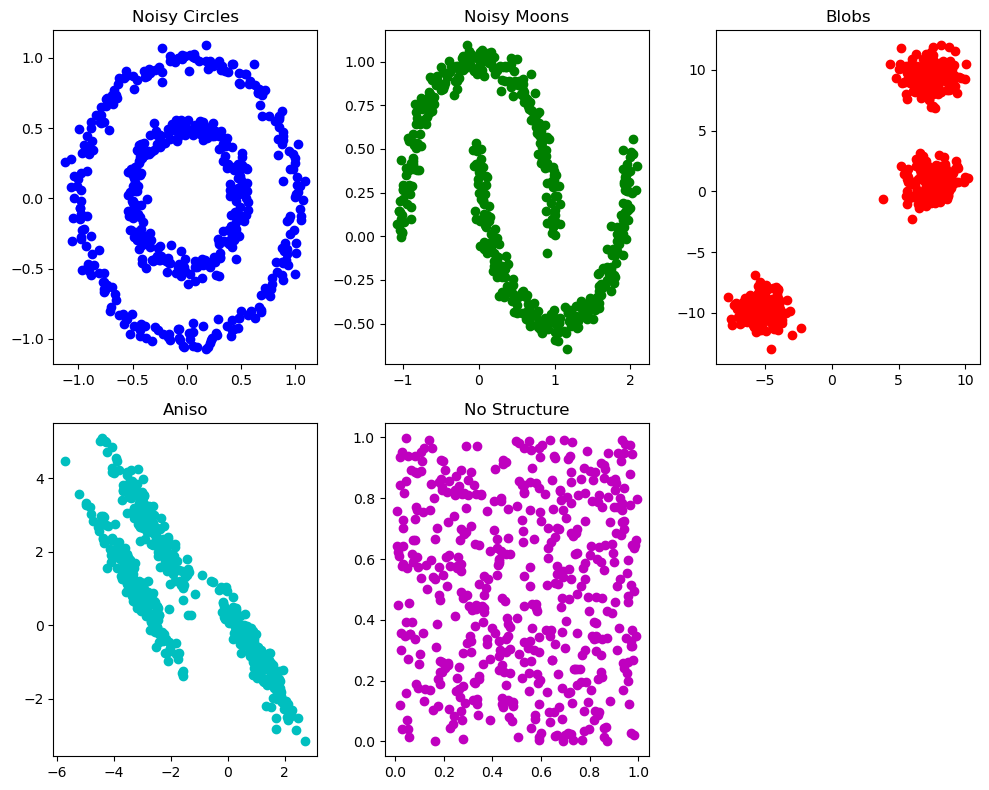

In [6]:
# Drawing scatter plots
# Create a scatterplot for each dataset
plt.figure(figsize=(10, 8))

plt.subplot(231)
plt.scatter(x1, y1, c='b')
plt.title('Noisy Circles')

plt.subplot(232)
plt.scatter(x2, y2, c='g')
plt.title('Noisy Moons')

plt.subplot(233)
plt.scatter(x3, y3, c='r')
plt.title('Blobs')

plt.subplot(234)
plt.scatter(x4, y4, c='c')
plt.title('Aniso')

plt.subplot(235)
plt.scatter(x5, y5, c='m')
plt.title('No Structure')

plt.tight_layout()
plt.show()

### 3.K-means Clustering

Apply K-means clustering.

In [30]:
# Apply K-means clustering on dataset 1
kmeans1 = KMeans(n_clusters=2)
kmeans1.fit(noisy_circles)
labels1 = kmeans1.labels_

# Apply K-means clustering on dataset 2
kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(noisy_moons)
labels2 = kmeans2.labels_

# Apply K-means clustering on dataset 3
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(blobs)
labels3 = kmeans3.labels_

# Apply K-means clustering on dataset 4
kmeans4 = KMeans(n_clusters=3)
kmeans4.fit(aniso)
labels4 = kmeans4.labels_

# Apply K-means clustering on dataset 5
kmeans5 = KMeans(n_clusters=3)
kmeans5.fit(no_structure)
labels5 = kmeans5.labels_

/Users/heyuxuan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/heyuxuan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/heyuxuan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/heyuxuan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/h

Visualize the clustering results.

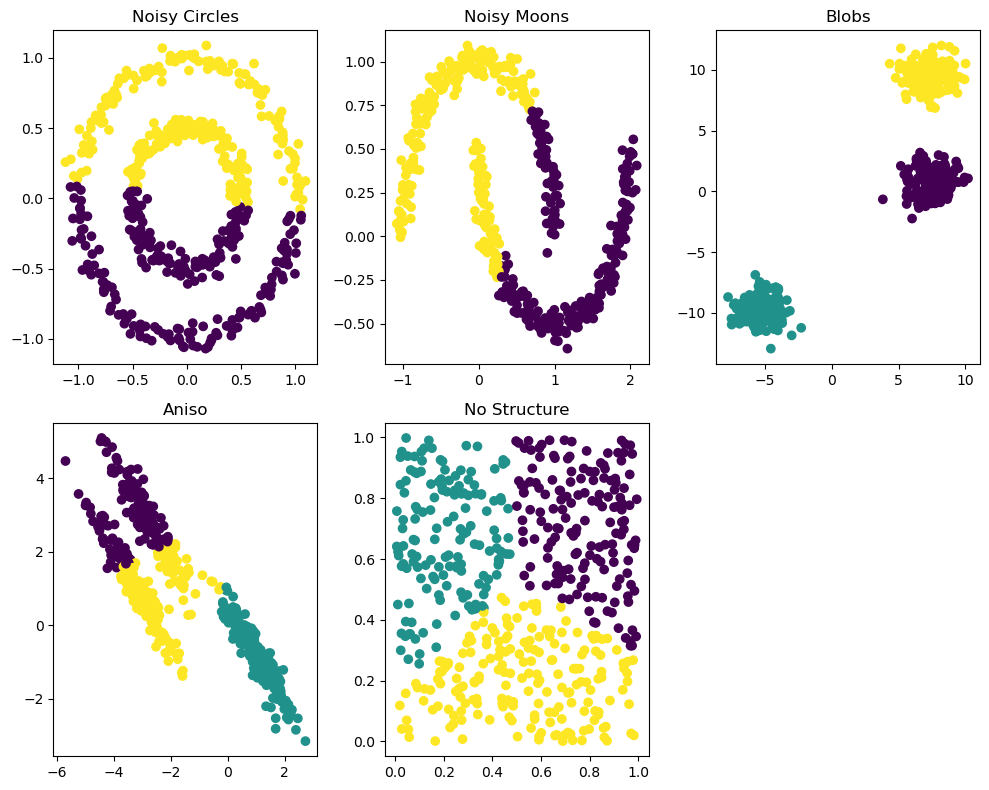

In [31]:
# Use K-means Clustering
plt.figure(figsize=(10, 8))
plt.subplot(231)
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1], c=labels1)
plt.title('Noisy Circles')

plt.subplot(232)
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=labels2)
plt.title('Noisy Moons')

plt.subplot(233)
plt.scatter(blobs[:, 0], blobs[:, 1], c=labels3)
plt.title('Blobs')

plt.subplot(234)
plt.scatter(aniso[:, 0], aniso[:, 1], c=labels4)
plt.title('Aniso')

plt.subplot(235)
plt.scatter(no_structure[:, 0], no_structure[:, 1], c=labels5)
plt.title('No Structure')

plt.tight_layout()
plt.show()


### 4.DBScan Clustering

We get the classification results under the same parameters and we can see that the classification effect is different.

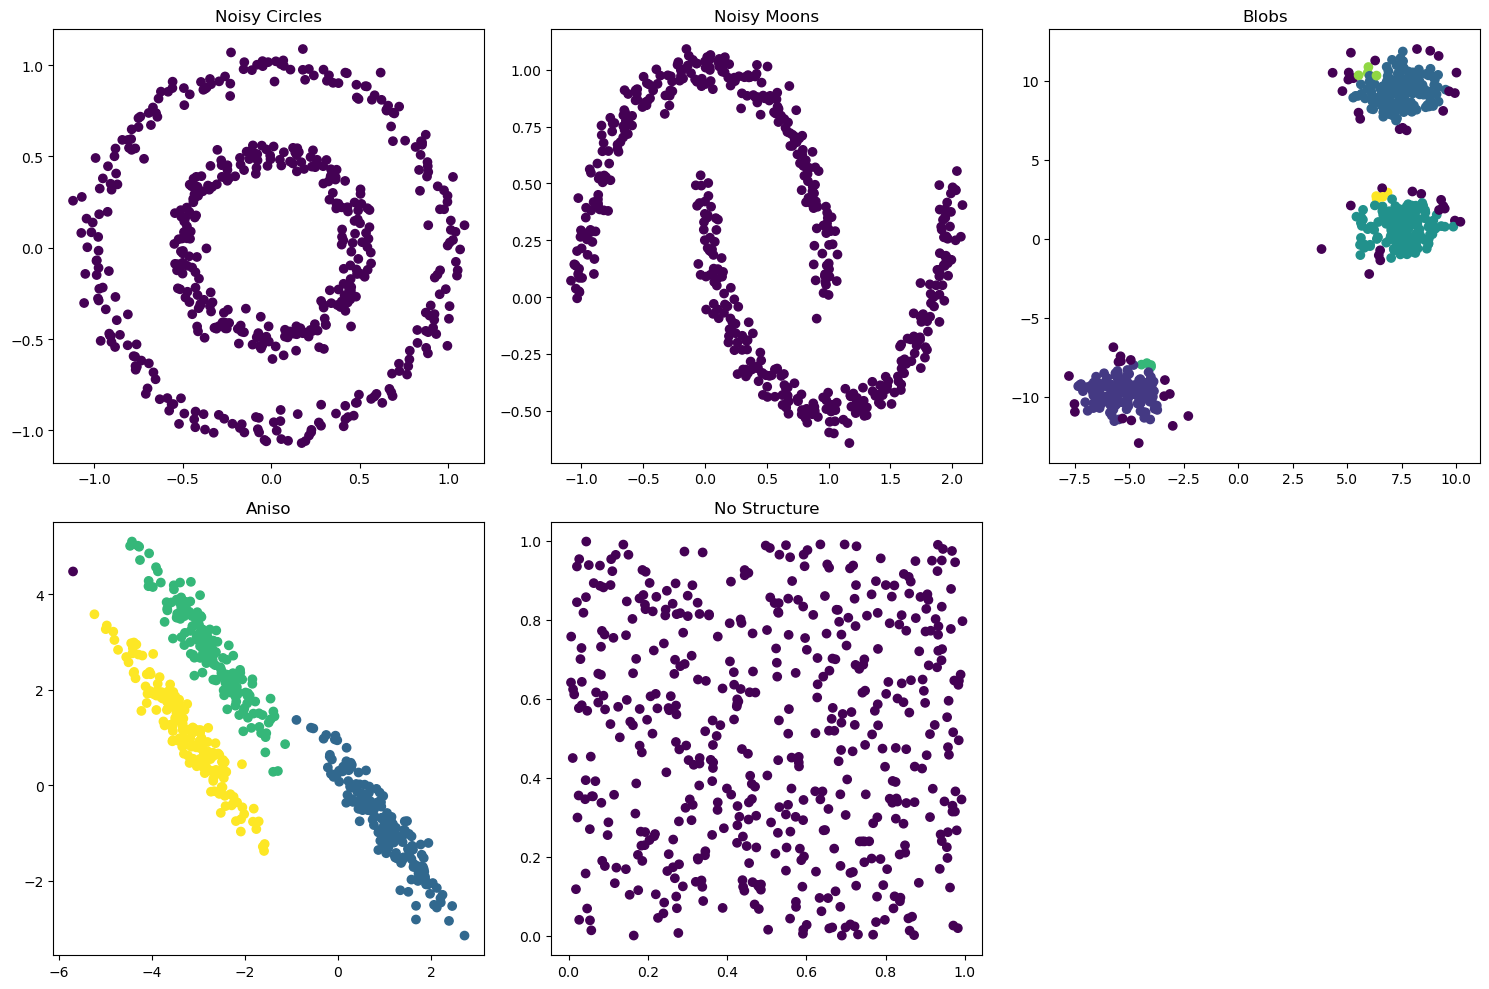

In [32]:
plt.figure(figsize=(15, 10))
dbscan = DBSCAN(eps=0.5, min_samples=5)

plt.subplot(231)
dbscan.fit(noisy_circles)
labels1 = dbscan.labels_
plt.scatter(x1, y1, c=labels1)
plt.title('Noisy Circles')

plt.subplot(232)
dbscan.fit(noisy_moons)
labels2 = dbscan.labels_
plt.scatter(x2, y2, c=labels2)
plt.title('Noisy Moons')

plt.subplot(233)
dbscan.fit(blobs)
labels3 = dbscan.labels_
plt.scatter(x3, y3, c=labels3)
plt.title('Blobs')

plt.subplot(234)
dbscan.fit(aniso)
labels4 = dbscan.labels_
plt.scatter(x4, y4, c=labels4)
plt.title('Aniso')

plt.subplot(235)
dbscan.fit(no_structure)
labels5 = dbscan.labels_
plt.scatter(x5, y5, c=labels5)
plt.title('No Structure')

plt.tight_layout()
plt.show()



#### (1) For the noisy_circles

We will observe the classification results under different parameters and find the most suitable parameter settings.

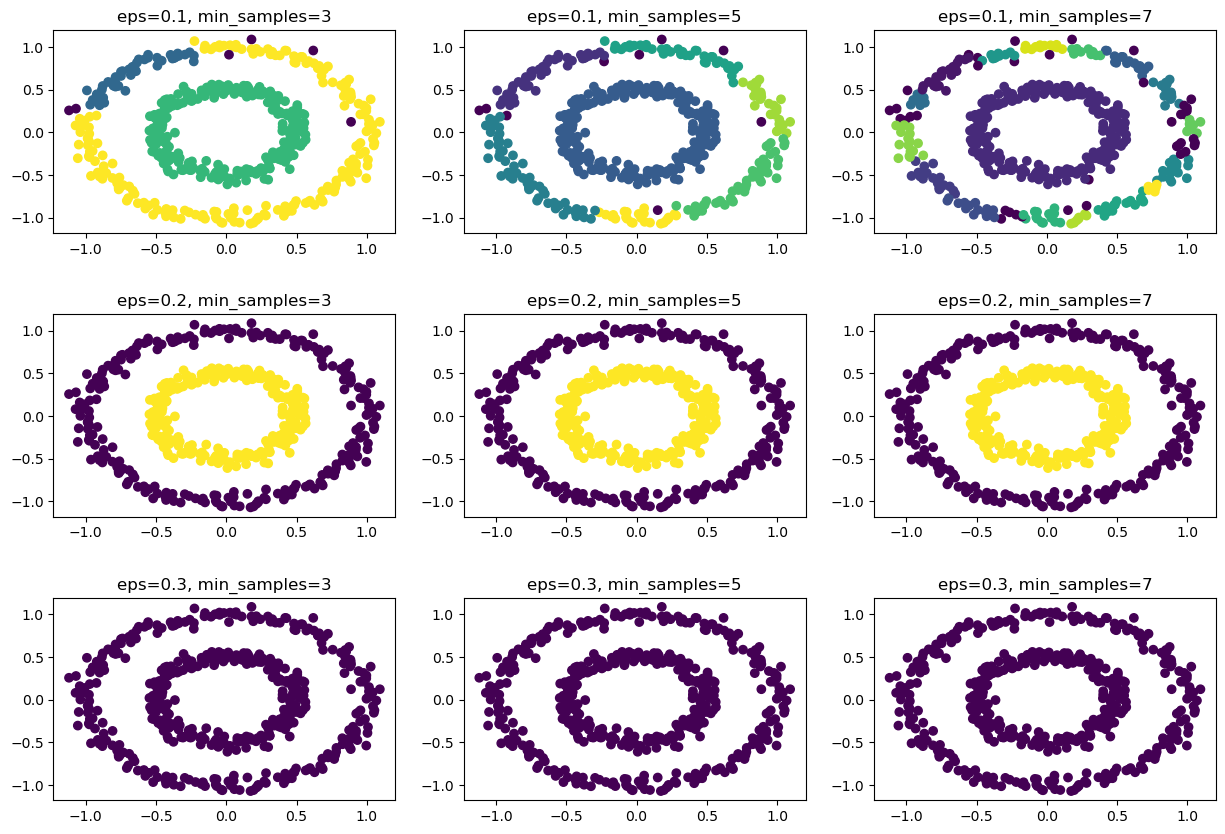

In [37]:
from sklearn.cluster import DBSCAN

eps_values = [0.1, 0.2, 0.3]
min_samples_values = [3, 5, 7]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(np.column_stack((x1, y1)))
        labels = dbscan.labels_

        plt.subplot(len(eps_values), len(min_samples_values), i * len(min_samples_values) + j + 1)
        plt.scatter(x1, y1, c=labels)
        plt.title(f'eps={eps}, min_samples={min_samples}')

plt.show()

We can see that when esp=0.2, min_sample appears to classify better between 3, 5, and 7.


#### （2） For the Noisy Moons

We will observe the classification results under different parameters and find the most suitable parameter settings.

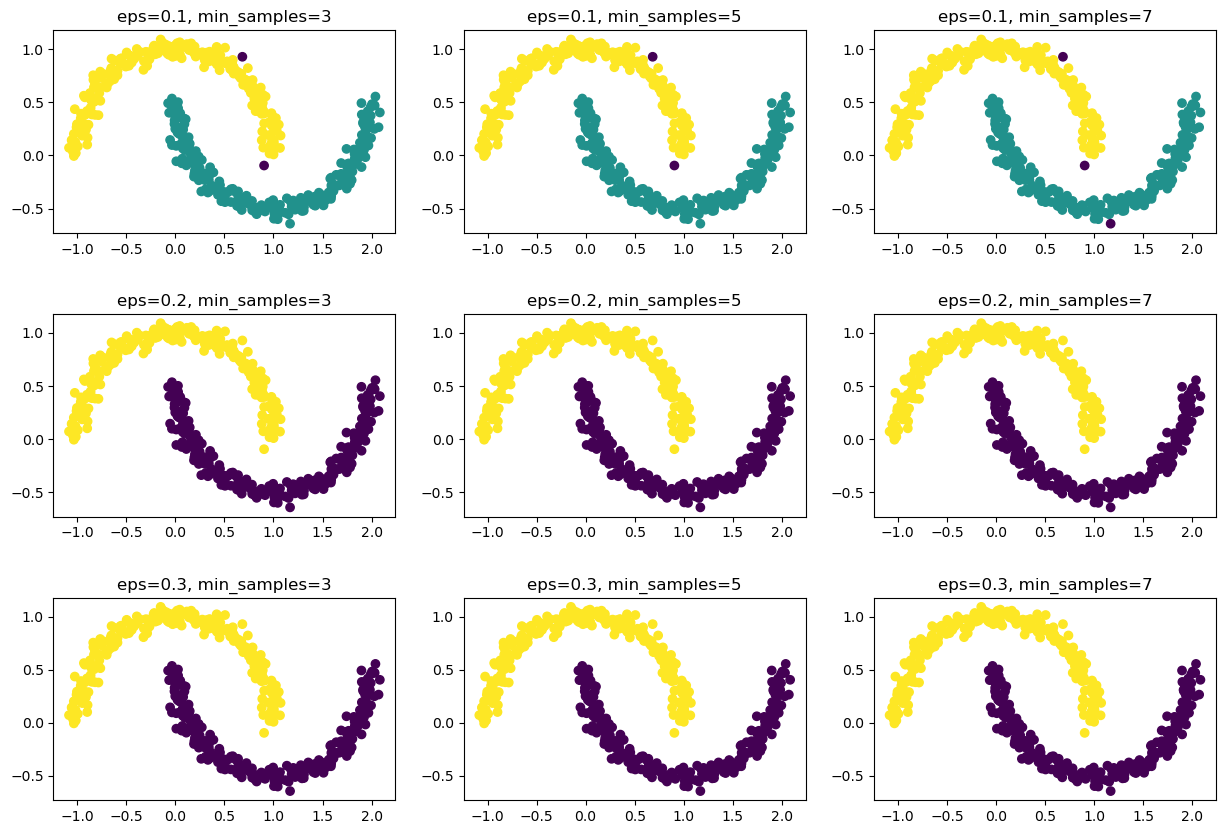

In [38]:
eps_values = [0.1, 0.2, 0.3]
min_samples_values = [3, 5, 7]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(np.column_stack((x2, y2)))
        labels = dbscan.labels_

        plt.subplot(len(eps_values), len(min_samples_values), i * len(min_samples_values) + j + 1)
        plt.scatter(x2, y2, c=labels)
        plt.title(f'eps={eps}, min_samples={min_samples}')

plt.show()

We can see that when esp=0.2, min_sample appears to classify better between 3, 5, and 7.

#### (3) For the Blobs

We will observe the classification results under different parameters and find the most suitable parameter settings.

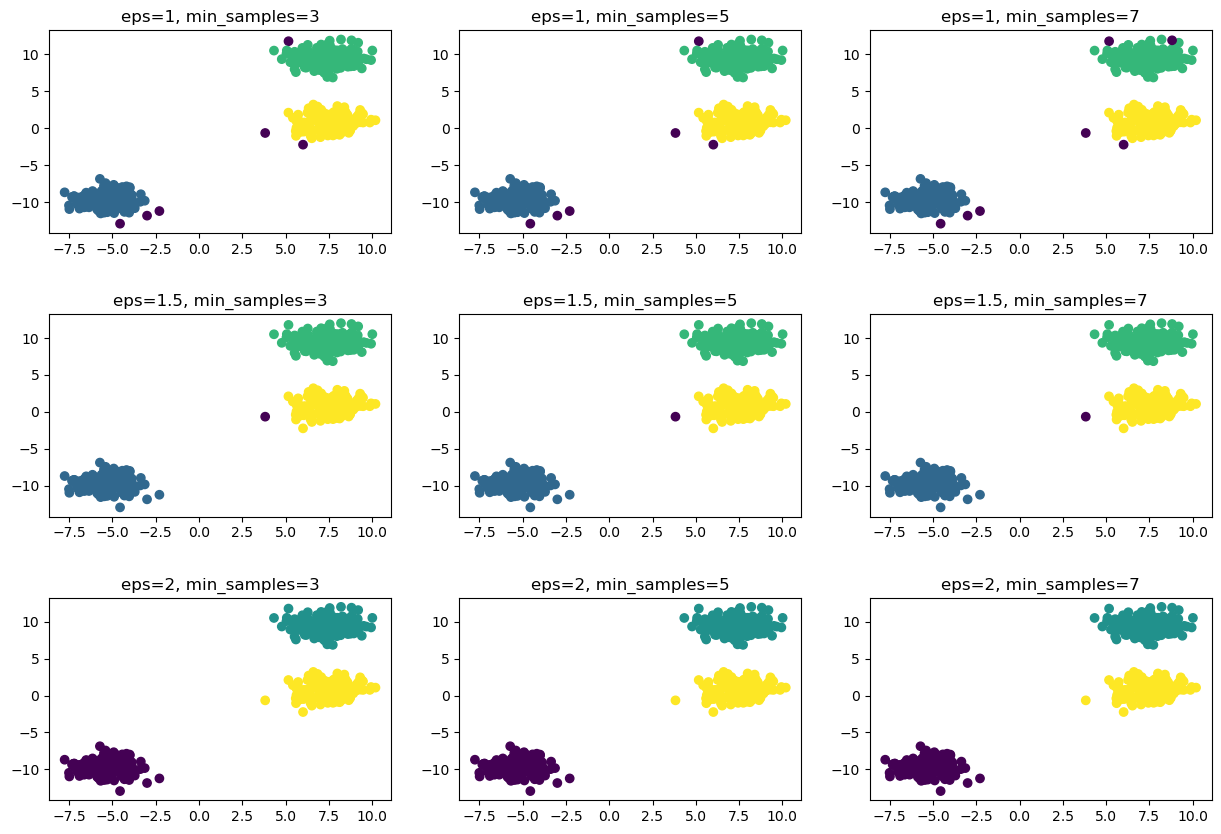

In [44]:
eps_values = [1, 1.5, 2]
min_samples_values = [3, 5, 7]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(np.column_stack((x3, y3)))
        labels = dbscan.labels_

        plt.subplot(len(eps_values), len(min_samples_values), i * len(min_samples_values) + j + 1)
        plt.scatter(x3, y3, c=labels)
        plt.title(f'eps={eps}, min_samples={min_samples}')

plt.show()

We can see that when esp=2, min_sample appears to classify better between 3, 5, and 7.

#### (4) For the Aniso

We will observe the classification results under different parameters and find the most suitable parameter settings.

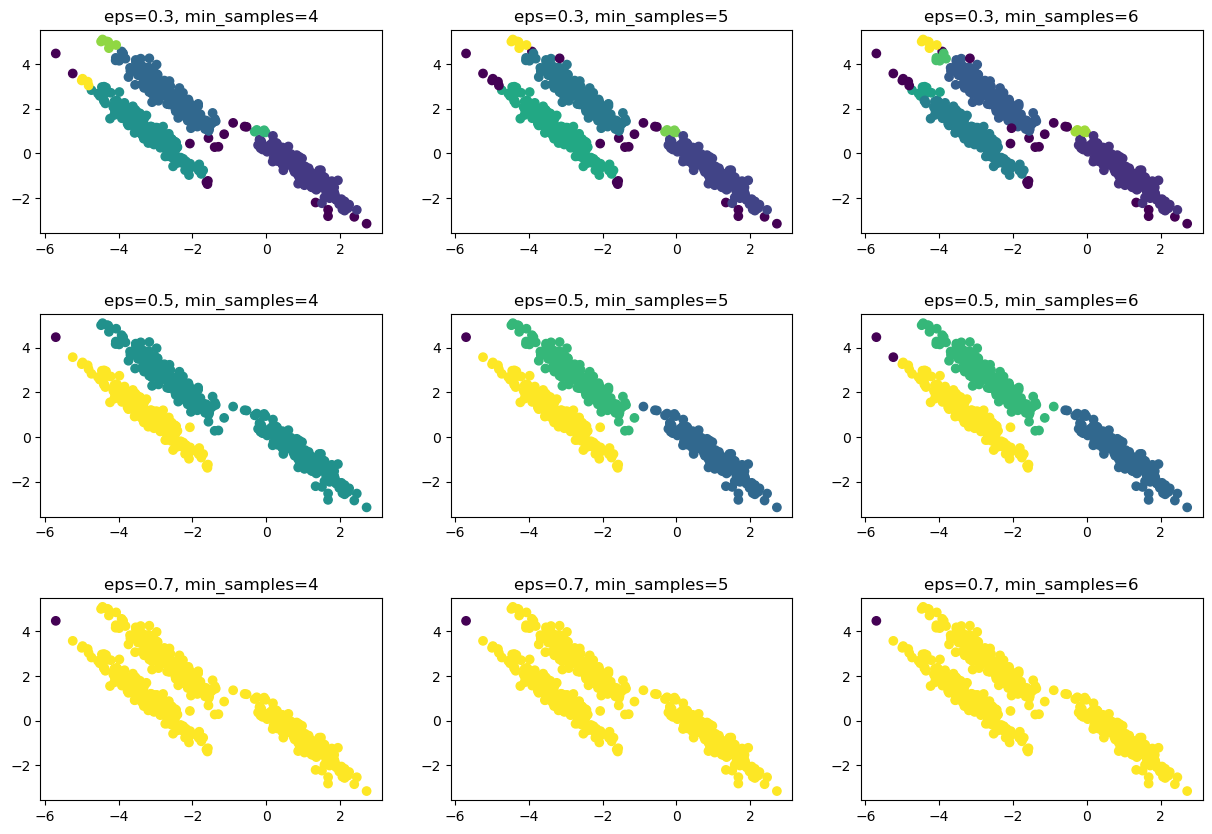

In [62]:
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [4, 5, 6]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(np.column_stack((x4, y4)))
        labels = dbscan.labels_

        plt.subplot(len(eps_values), len(min_samples_values), i * len(min_samples_values) + j + 1)
        plt.scatter(x4, y4, c=labels)
        plt.title(f'eps={eps}, min_samples={min_samples}')

plt.show()

We can see that when esp=0.5, min_sample appears to classify better at 5.

#### (5) For the No Structure

We will observe the classification results under different parameters and find the most suitable parameter settings.

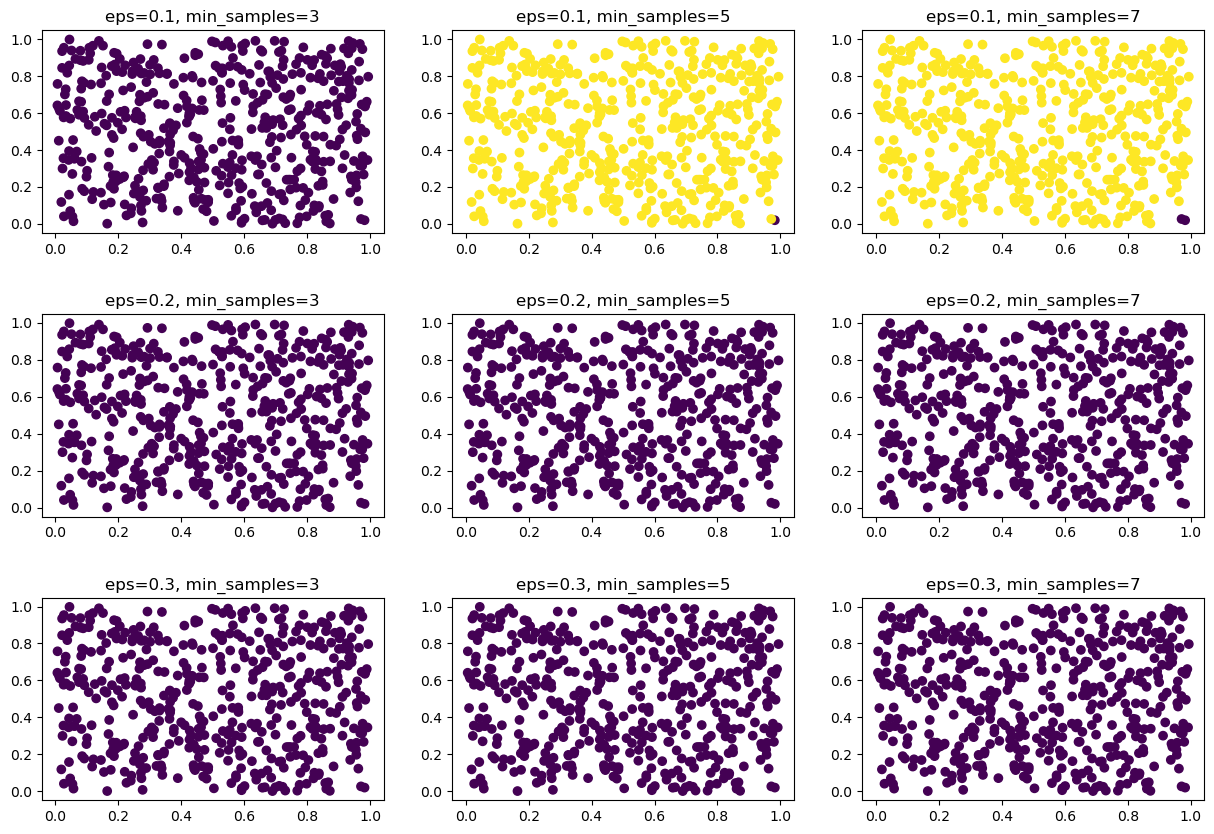

In [68]:
from sklearn.decomposition import PCA

eps_values = [0.1, 0.2, 0.3]
min_samples_values = [3, 5, 7]

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(np.column_stack((x5, y5)))
        labels = dbscan.labels_

        plt.subplot(len(eps_values), len(min_samples_values), i * len(min_samples_values) + j + 1)
        plt.scatter(x5, y5, c=labels)
        plt.title(f'eps={eps}, min_samples={min_samples}')

plt.show()

Since the data in the database is without apparent structure, we cannot get a proper classification result.


### Results of DBScan Clustering

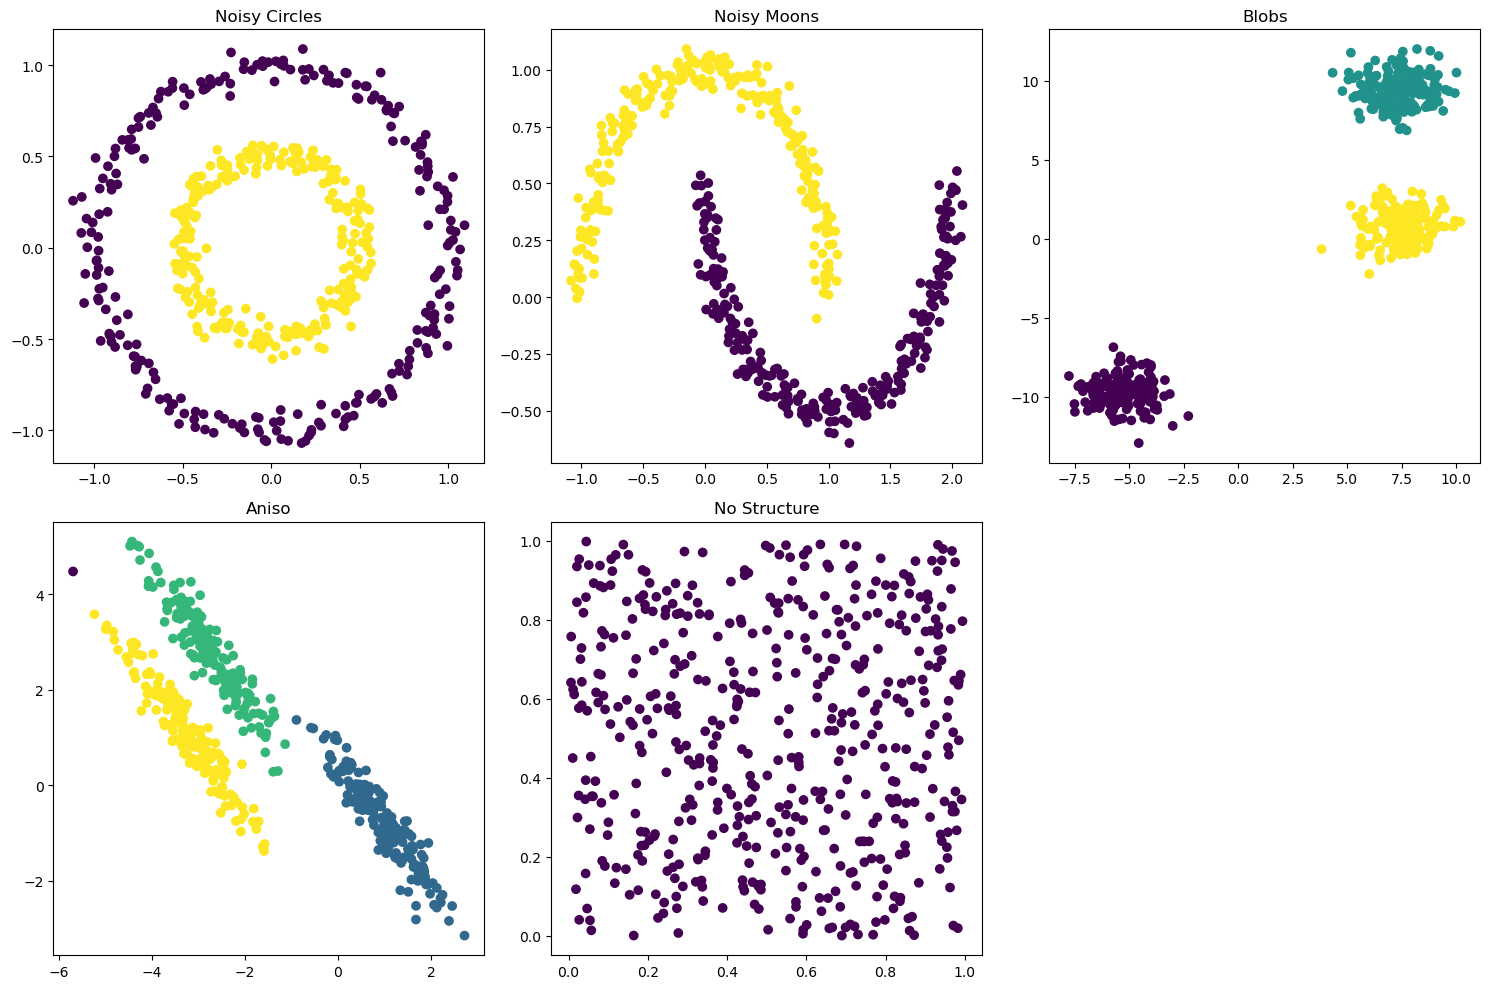

In [69]:
plt.figure(figsize=(15, 10))

plt.subplot(231)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(noisy_circles)
labels1 = dbscan.labels_
plt.scatter(x1, y1, c=labels1)
plt.title('Noisy Circles')

plt.subplot(232)
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(noisy_moons)
labels2 = dbscan.labels_
plt.scatter(x2, y2, c=labels2)
plt.title('Noisy Moons')

plt.subplot(233)
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(blobs)
labels3 = dbscan.labels_
plt.scatter(x3, y3, c=labels3)
plt.title('Blobs')

plt.subplot(234)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(aniso)
labels4 = dbscan.labels_
plt.scatter(x4, y4, c=labels4)
plt.title('Aniso')

plt.subplot(235)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(no_structure)
labels5 = dbscan.labels_
plt.scatter(x5, y5, c=labels5)
plt.title('No Structure')

plt.tight_layout()
plt.show()